In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("C:/Users/DELL/Downloads/Campaign_data.csv")
df.head()

,Campaign_ID,Campaign_Goal,Duration(days),Channel_Used,Conversion_Rate,Acquisition_Cost($),ROI,Clicks,Impressions,Age_Range,conversions,Total_spend,CTR,Revenue
0,529013,Product Launch,15,Instagram,0.15,500.0,5.790000,500,3000,35-44,75.00,37500.0,0.166667,254625.00
1,275352,Market Expansion,15,Facebook,0.01,500.0,7.210000,500,3000,45-60,5.00,2500.0,0.166667,20525.00
2,692322,Product Launch,15,Instagram,0.08,500.0,0.430000,500,3000,45-60,40.00,20000.0,0.166667,28600.00
3,675757,Increase Sales,15,Pinterest,0.03,500.0,0.909824,293,1937,25-34,8.79,4395.0,0.151265,8393.67
4,535900,Market Expansion,15,Pinterest,0.13,500.0,1.422828,293,1937,45-60,38.09,19045.0,0.151265,46142.76


In [3]:
df1=df.copy()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Campaign_ID          300000 non-null  int64  
 1   Campaign_Goal        300000 non-null  int64  
 2   Duration(days)       300000 non-null  int64  
 3   Channel_Used         300000 non-null  int64  
 4   Conversion_Rate      300000 non-null  float64
 5   Acquisition_Cost($)  300000 non-null  float64
 6   ROI                  300000 non-null  float64
 7   Clicks               300000 non-null  int64  
 8   Impressions          300000 non-null  int64  
 9   Age_Range            300000 non-null  int64  
 10  conversions          300000 non-null  float64
 11  Total_spend          300000 non-null  float64
 12  CTR                  300000 non-null  float64
 13  Revenue              300000 non-null  float64
dtypes: float64(7), int64(7)
memory usage: 32.0 MB


In [39]:
df.describe()

,Campaign_ID,Campaign_Goal,Duration(days),Channel_Used,Conversion_Rate,Acquisition_Cost($),ROI,Clicks,Impressions,Age_Range,conversions,Total_spend,CTR,Revenue
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,3.000000e+05,300000.000000,3.000000e+05
mean,550444.817930,1.501430,37.500000,1.497623,0.080009,7753.750946,3.177691,18153.673343,56034.237467,1.776897,1453.379471,1.478990e+07,0.314156,6.594974e+07
std,260252.569191,1.118863,16.770538,1.117300,0.040563,4301.035096,2.461200,11027.023811,32583.135246,1.315989,1234.337804,1.696528e+07,0.024657,9.799006e+07
min,100001.000000,0.000000,15.000000,0.000000,0.010000,500.000000,0.000000,293.000000,1937.000000,0.000000,3.330000,1.665000e+03,0.151187,1.869600e+03
25%,325003.500000,0.000000,26.250000,0.000000,0.050000,4121.915000,0.930000,8821.000000,28362.000000,1.000000,468.647500,2.166387e+06,0.301698,6.326038e+06
50%,551164.500000,2.000000,37.500000,1.000000,0.080000,7755.900000,2.670000,17230.000000,54098.000000,2.000000,1097.660000,8.275741e+06,0.325373,2.610933e+07
75%,776284.500000,3.000000,48.750000,2.000000,0.110000,11385.075000,5.330000,26808.000000,80925.250000,3.000000,2136.487500,2.170376e+07,0.331266,8.069576e+07
max,999998.000000,3.000000,60.000000,3.000000,0.150000,15000.000000,8.000000,40000.000000,120000.000000,4.000000,5999.550000,8.999325e+07,0.333333,8.019567e+08


In [4]:
df.columns

Index(['Campaign_ID', 'Campaign_Goal', 'Duration(days)', 'Channel_Used',
       'Conversion_Rate', 'Acquisition_Cost($)', 'ROI', 'Clicks',
       'Impressions', 'Age_Range', 'conversions', 'Total_spend', 'CTR',
       'Revenue'],
      dtype='object')

In [5]:
df.Age_Range.unique()

array(['35-44', '45-60', '25-34', 'All', '18-24'], dtype=object)

In [6]:
df['Campaign_Goal'] = df['Campaign_Goal'].map({'Product Launch': 0,'Market Expansion': 1,'Increase Sales': 2,'Brand Awareness':3})
df['Channel_Used'] = df['Channel_Used'].map({'Instagram': 0,'Facebook': 1,'Pinterest': 2,'Twitter':3})
df['Age_Range'] = df['Age_Range'].map({'25-34': 0,'18-24':1, '35-44': 2,'45-60': 3,'All': 4})  

In [7]:
df.corr()

,Campaign_ID,Campaign_Goal,Duration(days),Channel_Used,Conversion_Rate,Acquisition_Cost($),ROI,Clicks,Impressions,Age_Range,conversions,Total_spend,CTR,Revenue
Campaign_ID,1.000000,0.000921,0.002792,0.002345,-0.000761,0.003352,0.000485,0.002907,0.002993,-0.003494,0.001728,0.001978,0.001997,0.001270
Campaign_Goal,0.000921,1.000000,0.001054,0.002760,0.000039,0.001518,-0.001956,0.001435,0.001446,-0.000941,0.001276,0.001381,0.001048,0.001069
Duration(days),0.002792,0.001054,1.000000,0.004524,0.001047,0.965885,-0.001457,0.896782,0.913744,-0.000688,0.641895,0.718197,0.507920,0.554618
Channel_Used,0.002345,0.002760,0.004524,1.000000,0.005421,0.004375,-0.150434,-0.080922,-0.070870,0.001760,-0.055382,-0.041190,-0.128545,-0.072794
Conversion_Rate,-0.000761,0.000039,0.001047,0.005421,1.000000,0.002076,-0.000249,0.002046,0.002054,0.001708,0.597959,0.442833,0.002979,0.342025
Acquisition_Cost($),0.003352,0.001518,0.965885,0.004375,0.002076,1.000000,-0.001659,0.925816,0.943342,-0.000505,0.663179,0.742776,0.568081,0.573920
ROI,0.000485,-0.001956,-0.001457,-0.150434,-0.000249,-0.001659,1.000000,0.188343,0.166009,0.003483,0.134281,0.099679,0.292593,0.442318
Clicks,0.002907,0.001435,0.896782,-0.080922,0.002046,0.925816,0.188343,1.000000,0.998769,0.000952,0.716391,0.772673,0.695255,0.673470
Impressions,0.002993,0.001446,0.913744,-0.070870,0.002054,0.943342,0.166009,0.998769,1.000000,0.000763,0.715495,0.775140,0.684816,0.665846
Age_Range,-0.003494,-0.000941,-0.000688,0.001760,0.001708,-0.000505,0.003483,0.000952,0.000763,1.000000,0.001598,0.001196,0.000324,0.002035


In [9]:
df.corr()['ROI'].sort_values(ascending=False)

ROI                    1.000000
Revenue                0.442318
CTR                    0.292593
Clicks                 0.188343
Impressions            0.166009
conversions            0.134281
Total_spend            0.099679
Age_Range              0.003483
Campaign_ID            0.000485
Conversion_Rate       -0.000249
Duration(days)        -0.001457
Acquisition_Cost($)   -0.001659
Campaign_Goal         -0.001956
Channel_Used          -0.150434
Name: ROI, dtype: float64

In [108]:
df.corr()['Revenue'].sort_values(ascending=False)

Revenue                1.000000
Total_spend            0.834249
conversions            0.809211
Clicks                 0.673470
Impressions            0.665846
Acquisition_Cost($)    0.573920
Duration(days)         0.554618
ROAS                   0.442318
ROI                    0.442318
CTR                    0.414807
Conversion_Rate        0.342025
Age_Range              0.002035
Campaign_ID            0.001270
Campaign_Goal          0.001069
Channel_Used          -0.072794
Name: Revenue, dtype: float64

In [110]:
df.corr()['conversions'].sort_values(ascending=False)

conversions            1.000000
Total_spend            0.958223
Revenue                0.809211
Clicks                 0.716391
Impressions            0.715495
Acquisition_Cost($)    0.663179
Duration(days)         0.641895
Conversion_Rate        0.597959
CTR                    0.497589
ROAS                   0.134281
ROI                    0.134281
Campaign_ID            0.001728
Age_Range              0.001598
Campaign_Goal          0.001276
Channel_Used          -0.055382
Name: conversions, dtype: float64

<Axes: xlabel='ROI', ylabel='Count'>

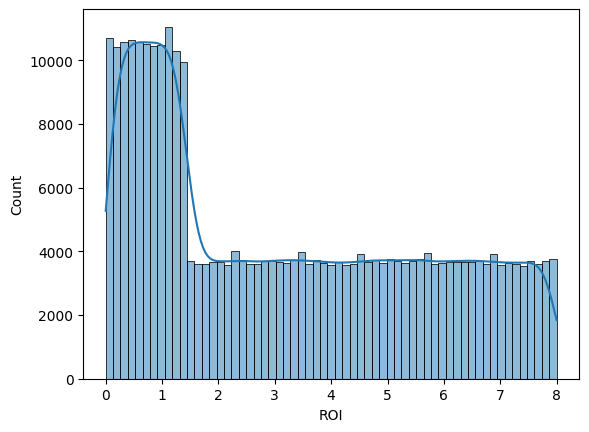

In [11]:
sns.histplot(df['ROI'], kde=True)

<Axes: xlabel='ROI'>

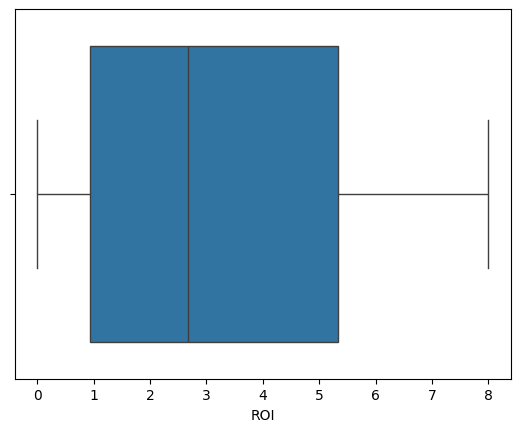

In [12]:
sns.boxplot(x=df['ROI'])

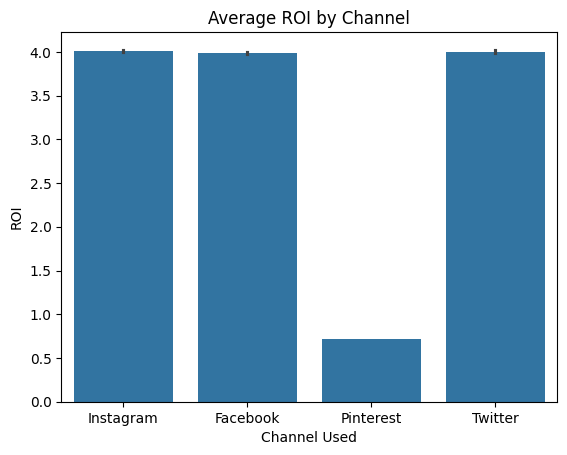

In [14]:
sns.barplot(x='Channel_Used', y='ROI', data=df1)
plt.title("Average ROI by Channel")
plt.xlabel("Channel Used")
plt.ylabel("ROI")
plt.show()

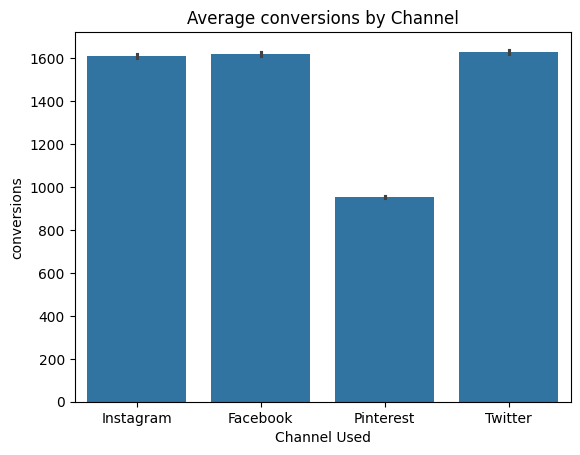

In [58]:
sns.barplot(x='Channel_Used', y='conversions', data=df1)
plt.title("Average conversions by Channel")
plt.xlabel("Channel Used")
plt.ylabel("conversions")
plt.show()

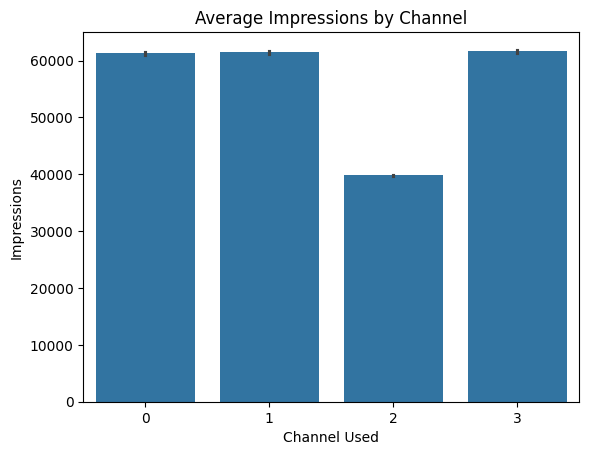

In [62]:
sns.barplot(x='Channel_Used', y='Impressions', data=df1)
plt.title("Average Impressions by Channel")
plt.xlabel("Channel Used")
plt.ylabel("Impressions")
plt.show()

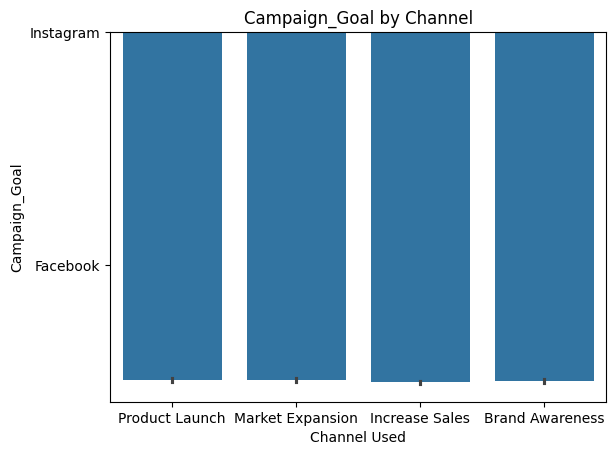

In [82]:
sns.barplot(y='Channel_Used', x='Campaign_Goal', data=df1)
plt.title("Campaign_Goal by Channel")
plt.xlabel("Channel Used")
plt.ylabel("Campaign_Goal")
plt.show()

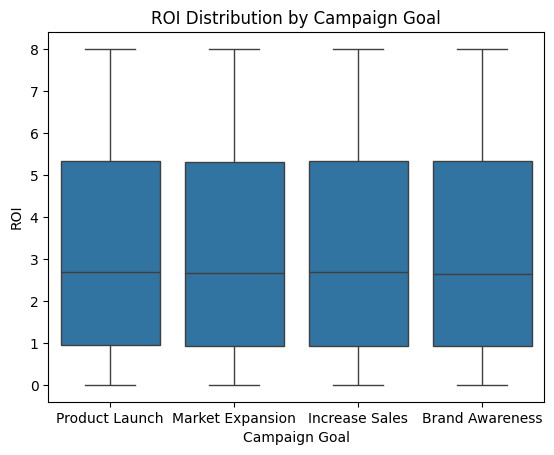

In [15]:
sns.boxplot(x='Campaign_Goal', y='ROI', data=df1)
plt.title("ROI Distribution by Campaign Goal")
plt.xlabel("Campaign Goal")
plt.ylabel("ROI")
plt.show()

<Axes: xlabel='Revenue', ylabel='ROI'>

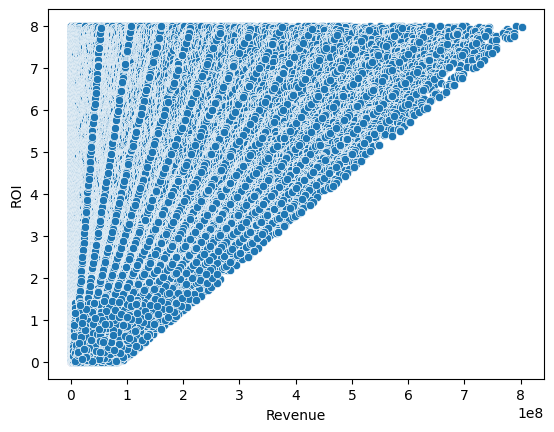

In [44]:
sns.scatterplot(x=df.Revenue,y=df.ROI)

In [48]:
df.columns

Index(['Campaign_ID', 'Campaign_Goal', 'Duration(days)', 'Channel_Used',
       'Conversion_Rate', 'Acquisition_Cost($)', 'ROI', 'Clicks',
       'Impressions', 'Age_Range', 'conversions', 'Total_spend', 'CTR',
       'Revenue'],
      dtype='object')

In [70]:
channel = df1.groupby('Channel_Used').agg({'ROI': ['mean', 'median', 'count'],'Total_spend': 'sum','Revenue': 'sum','Conversion_Rate': 'mean',
                                           'Acquisition_Cost($)': 'mean'}).round(2)

channel['ROAS'] = channel['Revenue']['sum'] / channel['Total_spend']['sum']
channel['Spend_Ratio'] = channel['Total_spend']['sum'] / df1['Total_spend'].sum()

In [72]:
channel

ROI                 Total_spend       Revenue Conversion_Rate  \
              mean median  count           sum           sum            mean   
Channel_Used                                                                   
Facebook      3.99   3.98  75164  1.238520e+12  6.183623e+12            0.08   
Instagram     4.01   4.02  75101  1.231084e+12  6.165133e+12            0.08   
Pinterest     0.72   0.72  75082  7.299405e+11  1.252691e+12            0.08   
Twitter       4.00   4.00  74653  1.237426e+12  6.183474e+12            0.08   

             Acquisition_Cost($)      ROAS Spend_Ratio  
                            mean                        
Channel_Used                                            
Facebook                 7745.02  4.992753    0.279136  
Instagram                7726.25  5.007889    0.277461  
Pinterest                7769.74  1.716155    0.164513  
Twitter                  7774.12  4.997045    0.278890

In [96]:
goal= df1.groupby('Campaign_Goal').agg({'ROI': ['mean', 'median', 'count'],'Total_spend': 'sum','Revenue': 'sum',
                                        'Conversion_Rate': 'mean','Acquisition_Cost($)': 'mean'}).round(2)

goal['ROAS'] = goal['Revenue'] / goal['Total_spend']
goal['Spend_Ratio'] = goal['Total_spend']['sum'] / df1['Total_spend'].sum()

In [98]:
goal

ROI                 Total_spend       Revenue  \
                  mean median  count           sum           sum   
Campaign_Goal                                                      
Brand Awareness   3.17   2.65  75248  1.117701e+12  4.980701e+12   
Increase Sales    3.18   2.68  74963  1.106873e+12  4.943738e+12   
Market Expansion  3.17   2.66  74759  1.102819e+12  4.911253e+12   
Product Launch    3.19   2.68  75030  1.109578e+12  4.949229e+12   

                 Conversion_Rate Acquisition_Cost($)      ROAS Spend_Ratio  
                            mean                mean                        
Campaign_Goal                                                               
Brand Awareness             0.08             7774.54  4.456202    0.251906  
Increase Sales              0.08             7746.64  4.466401    0.249466  
Market Expansion            0.08             7734.56  4.453362    0.248552  
Product Launch              0.08             7759.14  4.460462    0.250076

In [104]:
df1['ROAS'] = df1['Revenue'] / df1['Total_spend']

In [114]:
df1.sort_values(by='ROAS', ascending=False).head(10)

,Campaign_ID,Campaign_Goal,Duration(days),Channel_Used,Conversion_Rate,Acquisition_Cost($),ROI,Clicks,Impressions,Age_Range,conversions,Total_spend,CTR,Revenue,ROAS
22114,562492,Brand Awareness,15,Twitter,0.11,1300.13,8.0,3411,11624,25-34,375.21,4.878218e+05,0.293445,4390396.00,9.0
57358,710784,Product Launch,15,Facebook,0.02,3260.35,8.0,8052,25369,All,161.04,5.250468e+05,0.317395,4725420.88,9.0
21850,684293,Market Expansion,15,Facebook,0.13,1282.28,8.0,3376,11521,18-24,438.88,5.627670e+05,0.293030,5064903.42,9.0
21996,162830,Brand Awareness,15,Instagram,0.11,1291.46,8.0,3396,11578,18-24,373.56,4.824378e+05,0.293315,4341940.18,9.0
20881,392552,Market Expansion,15,Facebook,0.09,1213.81,8.0,3249,11143,25-34,292.41,3.549302e+05,0.291573,3194371.64,9.0
45723,602394,Increase Sales,15,Twitter,0.08,2665.59,8.0,6520,20832,45-60,521.60,1.390372e+06,0.312980,12513345.70,9.0
77582,743515,Market Expansion,30,Twitter,0.03,4243.88,8.0,10714,33257,18-24,321.42,1.364068e+06,0.322158,12276611.19,9.0
69782,795110,Increase Sales,15,Facebook,0.06,3871.24,8.0,9687,30215,45-60,581.22,2.250042e+06,0.320602,20250379.02,9.0
71135,389849,Increase Sales,15,Instagram,0.04,3935.93,8.0,9866,30742,25-34,394.64,1.553275e+06,0.320929,13979478.74,9.0
70673,889138,Increase Sales,15,Instagram,0.07,3913.97,8.0,9805,30562,18-24,686.35,2.686353e+06,0.320823,24177179.79,9.0


In [116]:
df1.sort_values(by='ROAS', ascending=True).head(15)

,Campaign_ID,Campaign_Goal,Duration(days),Channel_Used,Conversion_Rate,Acquisition_Cost($),ROI,Clicks,Impressions,Age_Range,conversions,Total_spend,CTR,Revenue,ROAS
18173,840565,Product Launch,15,Pinterest,0.02,1015.92,0.0,1698,6512,45-60,33.96,3.450064e+04,0.260749,34500.64,1.0
14782,455333,Brand Awareness,15,Pinterest,0.08,753.23,0.0,1436,5658,18-24,114.88,8.653106e+04,0.253800,86531.06,1.0
25813,442497,Increase Sales,15,Pinterest,0.05,1542.01,0.0,2289,8436,45-60,114.45,1.764830e+05,0.271337,176483.04,1.0
24975,574527,Product Launch,15,Pinterest,0.03,1491.42,0.0,2224,8225,45-60,66.72,9.950754e+04,0.270395,99507.54,1.0
26254,460470,Product Launch,15,Instagram,0.13,1570.91,0.0,3956,13239,25-34,514.28,8.078876e+05,0.298814,807887.59,1.0
80652,688883,Product Launch,30,Twitter,0.01,4393.96,0.0,11119,34454,35-44,111.19,4.885644e+05,0.322720,488564.41,1.0
80973,971372,Brand Awareness,30,Instagram,0.02,4408.70,0.0,11161,34579,25-34,223.22,9.841100e+05,0.322768,984110.01,1.0
72384,482307,Brand Awareness,15,Pinterest,0.07,3996.28,0.0,5890,20162,35-44,412.30,1.647666e+06,0.292134,1647666.24,1.0
74321,710982,Market Expansion,15,Facebook,0.04,4089.66,0.0,10285,31985,45-60,411.40,1.682486e+06,0.321557,1682486.12,1.0
65733,219076,Market Expansion,15,Facebook,0.03,3673.81,0.0,9154,28635,35-44,274.62,1.008902e+06,0.319679,1008901.70,1.0
